In [1]:
import tempfile

import cv2
import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt
import requests
import torch

import todd

[2023-01-31 23:37:20,167 35449:4339303808][patches.py:82 todd <module>] INFO: `ipdb` is installed. Using it for debugging.


In [2]:
response = requests.get('http://images.cocodataset.org/val2017/000000000139.jpg')
assert response.status_code == 200
image: npt.NDArray[np.uint8] = np.frombuffer(response.content, dtype=np.uint8)
image = cv2.imdecode(image, cv2.IMREAD_ANYCOLOR)
h, w, c = image.shape
assert c == 3

In [3]:
data = dict(
    annotations = [
        dict(bbox=[236.98, 142.51, 24.7, 69.5], category_id=64),
        dict(bbox=[7.03, 167.76, 149.32, 94.87], category_id=72),
    ],
    categories = [
        dict(id=64, name='potted plant'), 
        dict(id=72, name='tv'),
    ],
)
category_id2name = {
    category['id']: category['name'] for category in data['categories']
}
category_ids = [
    annotation['category_id'] for annotation in data['annotations']
]
texts = [category_id2name[category_id] for category_id in category_ids]
bboxes = todd.BBoxesXYWH(
    torch.tensor([annotation['bbox'] for annotation in data['annotations']])
)
colors = [todd.Colors[category_id] for category_id in category_ids]

In [4]:
def imshow(image: npt.NDArray[np.uint8]) -> None:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()

def activation(visual: todd.visuals.BaseVisual) -> None:
    activation = torch.rand(h // 16, w // 16)
    visual.image(image)
    visual.activation(activation, width=w, height=h, opacity=0.3)

def annotations(visual: todd.visuals.BaseVisual) -> None:
    visual.image(image)
    visual.annotations(texts, bboxes, colors)

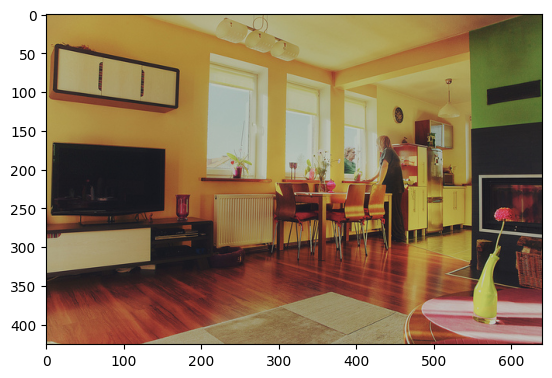

In [5]:
imshow(image)

In [6]:
with tempfile.TemporaryFile(suffix='.pptx') as f:
    visual = todd.visuals.PPTXVisual(w, h)
    activation(visual)
    visual.save(f)

In [7]:
with tempfile.TemporaryFile(suffix='.pptx') as f:
    visual = todd.visuals.PPTXVisual(w, h)
    annotations(visual)
    visual.save(f)

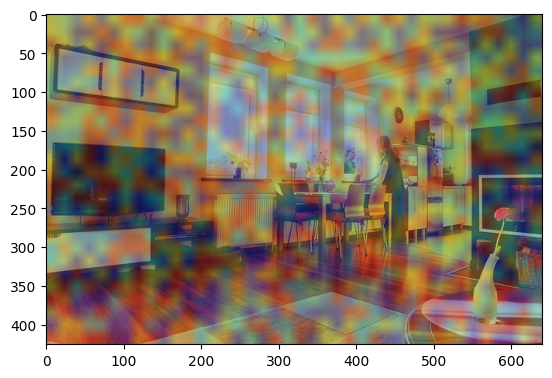

In [8]:
with tempfile.NamedTemporaryFile(suffix='.png') as f:
    visual = todd.visuals.CV2Visual(w, h)
    activation(visual)
    visual.save(f.name)
    imshow(cv2.imread(f.name))

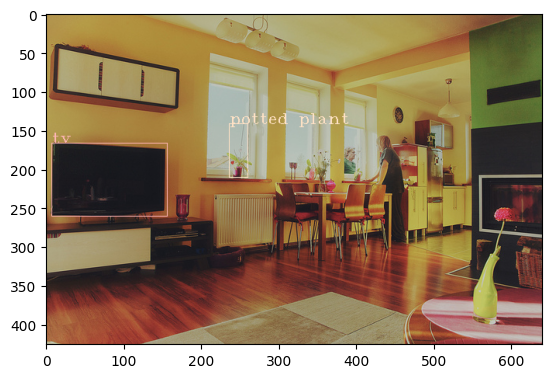

In [9]:
with tempfile.NamedTemporaryFile(suffix='.png') as f:
    visual = todd.visuals.CV2Visual(w, h)
    annotations(visual)
    visual.save(f.name)
    imshow(cv2.imread(f.name))